In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np


from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler, Imputer
import xgboost as xgb
import operator
import gc
import myutil

In [2]:
class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)
        
    def init_model(self):
        return    

    def train(self, x_train, y_train):
        self.dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, self.dtrain, self.nrounds)

    def predict(self, x):
        result = self.gbdt.predict(xgb.DMatrix(x))
        return result
    
    def get_coef(self):
        importance = self.gbdt.get_fscore()
        importance_df = pd.DataFrame(
                            sorted(importance.items(), key=operator.itemgetter(1)), 
                            columns=['feature','fscore']
                        )
        return importance_df['fscore']

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
}

xg = XgbWrapper(seed=0, params=xgb_params)

In [3]:
# Build model inputs
data, test, y = myutil.get_train_test_label()


(500, 826)
(500, 826)


In [4]:
oof_preds, test_preds, importances, folds = myutil.cross_validation(data, test, y, xg)

oof_preds has shape: (100,)
Fold  1 AUC : 0.806452
oof_preds has shape: (100,)
Fold  2 AUC : 0.723958
oof_preds has shape: (100,)
Fold  3 AUC : 0.770000
oof_preds has shape: (100,)
Fold  4 AUC : 0.863475
oof_preds has shape: (100,)
Fold  5 AUC : 0.749616
Full AUC score 0.783262


LogisticRegression
Index(['DAYS_BIRTH', 'install_DAYS_ENTRY_PAYMENT_sum',
       'install_DAYS_INSTALMENT_sum', 'credit_bal_AMT_BALANCE_max',
       'DAYS_REGISTRATION', 'bureau_DAYS_CREDIT_sum',
       'credit_bal_AMT_BALANCE_mean', 'bureau_DAYS_CREDIT_ENDDATE_sum',
       'credit_bal_AMT_CREDIT_LIMIT_ACTUAL_min', 'AMT_CREDIT',
       'bureau_DAYS_ENDDATE_FACT_sum', 'DAYS_EMPLOYED',
       'bureau_DAYS_CREDIT_UPDATE_sum', 'DAYS_ID_PUBLISH',
       'credit_bal_AMT_PAYMENT_max', 'prev_app_AMT_CREDIT_sum',
       'install_AMT_INSTALMENT_sum', 'bureau_DAYS_CREDIT_min',
       'prev_app_DAYS_FIRST_DUE_sum', 'bureau_DAYS_CREDIT_ENDDATE_min',
       'bureau_DAYS_ENDDATE_FACT_min', 'prev_app_DAYS_DECISION_sum',
       'bureau_DAYS_CREDIT_mean', 'install_AMT_PAYMENT_max',
       'credit_bal_AMT_PAYMENT_sum', 'prev_app_AMT_CREDIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_min',
       'credit_bal_AMT_DRAWINGS_POS_CURRENT_max',
       'install_DAYS_ENTRY_PAYMENT_min', 'install_DAYS_INSTALMENT_min'

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


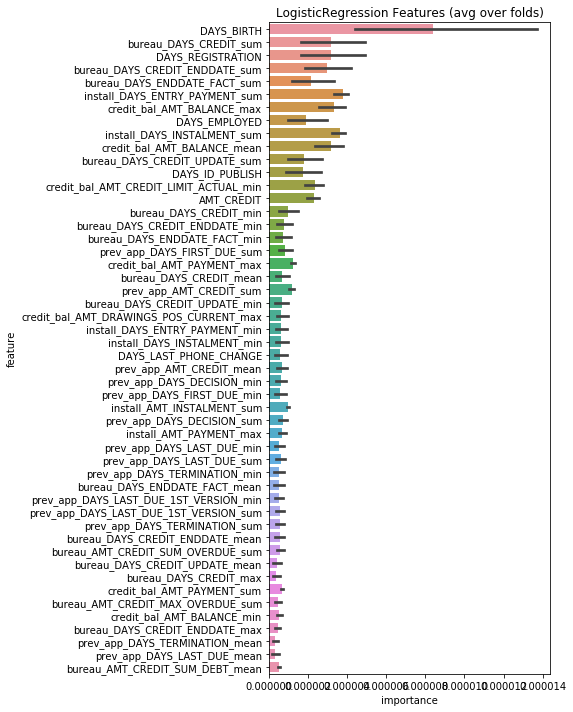

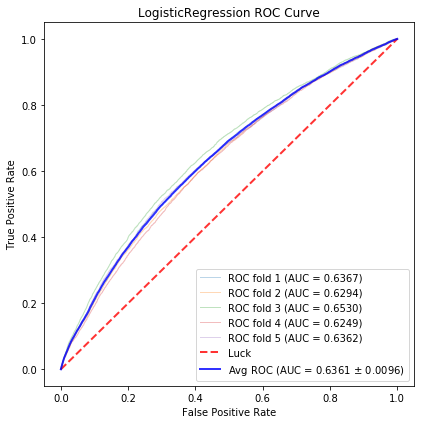

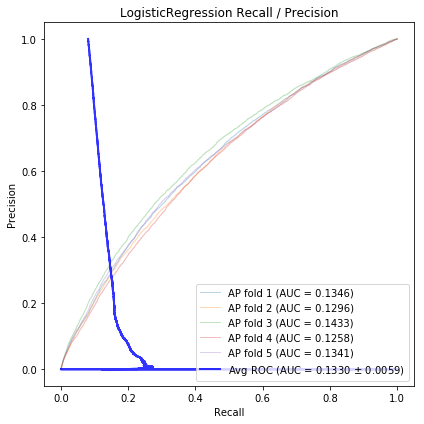

In [15]:
title = 'LogisticRegression'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title)